## Random Forest

### Importamos las librerías

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

### importamos los datos

In [2]:
df_train_labels = pd.read_csv('./../../datasets/train_labels.csv')
df_train_values = pd.read_csv('./../../datasets/train_values.csv')

### Filtramos los datos

In [3]:
df_train_labels_filtrados = df_train_labels.drop(['building_id'], axis=1)

In [4]:
df_train_values_filtrados = df_train_values.drop(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'land_surface_condition','foundation_type','roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'], axis=1)

### Implementación del algoritmo

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_train_values_filtrados, df_train_labels_filtrados, test_size=0.2, random_state=123)

In [6]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train.values.ravel())
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.569607


In [7]:
rf_model.feature_importances_

array([4.37599119e-02, 2.24491990e-01, 1.72215908e-01, 1.05642434e-01,
       4.16623238e-02, 1.74568561e-01, 3.69407074e-02, 8.84116809e-03,
       2.59087125e-02, 1.36785790e-02, 2.53449171e-02, 1.46340078e-02,
       1.16614502e-02, 6.21787111e-03, 9.86958276e-03, 4.27085516e-02,
       1.41647417e-02, 9.85691207e-03, 8.79978682e-03, 3.64076344e-03,
       7.37937174e-04, 3.58044018e-04, 1.19632063e-03, 1.31267155e-04,
       1.26275841e-04, 9.40542332e-05, 2.74722000e-03])

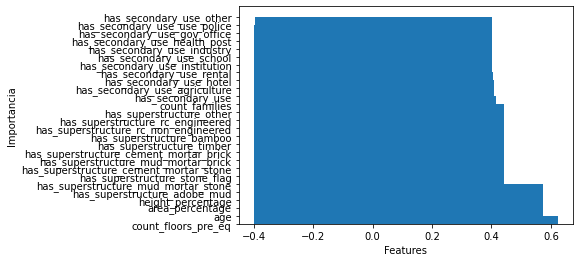

In [8]:
plt.bar(rf_model.feature_importances_, X_train.columns)
plt.xlabel('Features')
plt.ylabel('Importancia')

from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

plt.show()

### Prueba de los datos de tests

In [9]:
df_test_values = pd.read_csv('./../../datasets/test_values.csv')
df_train_values_filtrados = df_test_values.drop(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'land_surface_condition','foundation_type','roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'], axis=1)

### Predicción

In [10]:
preds = rf_model.predict(df_train_values_filtrados)

In [11]:
my_df = pd.DataFrame(preds)
my_df.to_csv('./../../datasets/prueba.csv')